# Tukey Box Plot & IQR Method

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Εισαγωγή συνόλου δεδομένων "Iris Dataset"

In [3]:
df = pd.read_csv("iris_dataset.txt", header=None, names=['sepal_length', 'sepal_width', 'petal_length'
                                                         ,'petal_width', 'type'])

## Περιγραφή των δεδομένων

In [4]:
#pd.options.display.float_format='{:.3f}'.format
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Απεικόνιση μέσω Box Plot

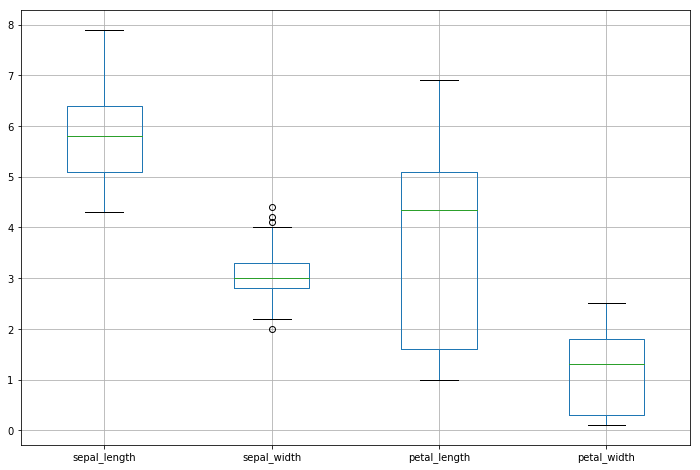

In [5]:
plt.figure(figsize=(12, 8))
df.boxplot(return_type='dict')

plt.plot();

### Παρατηρούμε πως στην στήλη "sepal_width" υπάρχουν ~4 τιμές εκτός ορίων

## Μέθοδος Tukey IQR

In [6]:
# Εύρεση του διατεταρτηµοριακού διαστήματος.

q1 = df["sepal_width"].quantile(0.25)
q3 = df["sepal_width"].quantile(0.75)
iqr = q3-q1

upper_threshold = q3+(iqr*1.5)
lower_threshold = q1-(iqr*1.5)

In [7]:
print( 'Lower Threshold:'+str(lower_threshold)+'\nUpper Threshold:'+str(upper_threshold))

Lower Threshold:2.05
Upper Threshold:4.05


In [8]:
outliers= df.loc[(df['sepal_width'] > upper_threshold) | (df['sepal_width'] < lower_threshold)]

In [9]:
outliers

,sepal_length,sepal_width,petal_length,petal_width,type
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [10]:
def filter_iqr(x):
    if (x < 2.05 or x > 4.05):
        return "Outlier"
    else:
        return "Normal"
df['outliers_based_on_IQR'] = df.apply(lambda row: filter_iqr(row['sepal_width']), axis=1)

In [12]:
df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,type,outliers_based_on_IQR
0,5.1,3.5,1.4,0.2,Iris-setosa,Normal
1,4.9,3.0,1.4,0.2,Iris-setosa,Normal
2,4.7,3.2,1.3,0.2,Iris-setosa,Normal
3,4.6,3.1,1.5,0.2,Iris-setosa,Normal
4,5.0,3.6,1.4,0.2,Iris-setosa,Normal
5,5.4,3.9,1.7,0.4,Iris-setosa,Normal
6,4.6,3.4,1.4,0.3,Iris-setosa,Normal
7,5.0,3.4,1.5,0.2,Iris-setosa,Normal
8,4.4,2.9,1.4,0.2,Iris-setosa,Normal
9,4.9,3.1,1.5,0.1,Iris-setosa,Normal
